In [858]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [859]:
list_of_df = []

In [860]:
pattern = r"Copy global->shared, size=\s*(\d+),\s*gDim=\s* (\d+), bDim=\s* (\d+), bw=\s*([\d.]+)GB\/s"

file_path = "./centralized_out_g2s_4_2_1.txt"



with open(file_path, 'r') as file:
     data = file.read()

matches = re.findall(pattern,data)
        
df0 = pd.DataFrame(matches, columns=["size", "gDim", "bDim", "bw"])

list_of_df.append(df0)

df0


,size,gDim,bDim,bw
0,8000,1,32,1.44
1,16000,1,32,2.00
2,24000,1,32,2.09
3,32000,1,32,2.18
4,40000,1,32,2.23
...,...,...,...,...
102,8000,1,576,3.09
103,16000,1,576,5.17
104,24000,1,576,4.96
105,32000,1,576,5.51


In [861]:
pattern = r"Copy shared->global, size=\s*(\d+),\s*gDim=\s* (\d+), bDim=\s* (\d+), bw=\s*([\d.]+)GB\/s"

file_path = "./centralized_out_s2g_4_2_1.txt"



with open(file_path, 'r') as file:
     data = file.read()

matches = re.findall(pattern,data)
        
df1 = pd.DataFrame(matches, columns=["size", "gDim", "bDim", "bw"])

list_of_df.append(df1)

df1


,size,gDim,bDim,bw
0,8000,1,32,2.08
1,16000,1,32,2.96
2,24000,1,32,3.15
3,32000,1,32,3.33
4,40000,1,32,3.37
...,...,...,...,...
102,8000,1,576,2.97
103,16000,1,576,6.12
104,24000,1,576,4.71
105,32000,1,576,4.80


In [862]:
for df in list_of_df:
    print(df)

      size gDim bDim    bw
0     8000    1   32  1.44
1    16000    1   32  2.00
2    24000    1   32  2.09
3    32000    1   32  2.18
4    40000    1   32  2.23
..     ...  ...  ...   ...
102   8000    1  576  3.09
103  16000    1  576  5.17
104  24000    1  576  4.96
105  32000    1  576  5.51
106  40000    1  576  5.58

[107 rows x 4 columns]
      size gDim bDim    bw
0     8000    1   32  2.08
1    16000    1   32  2.96
2    24000    1   32  3.15
3    32000    1   32  3.33
4    40000    1   32  3.37
..     ...  ...  ...   ...
102   8000    1  576  2.97
103  16000    1  576  6.12
104  24000    1  576  4.71
105  32000    1  576  4.80
106  40000    1  576  4.37

[107 rows x 4 columns]


In [863]:
list_of_df[0]["size"] = pd.to_numeric(list_of_df[0]["size"])
list_of_df[0]["gDim"] = pd.to_numeric(list_of_df[0]["gDim"])
list_of_df[0]["bDim"] = pd.to_numeric(list_of_df[0]["bDim"])
list_of_df[0]["bw"] = list_of_df[0]["bw"].astype(float)

list_of_df[1]["size"] = pd.to_numeric(list_of_df[1]["size"])
list_of_df[1]["gDim"] = pd.to_numeric(list_of_df[1]["gDim"])
list_of_df[1]["bDim"] = pd.to_numeric(list_of_df[1]["bDim"])
list_of_df[1]["bw"] = list_of_df[1]["bw"].astype(float)
print(df)



      size  gDim  bDim    bw
0     8000     1    32  2.08
1    16000     1    32  2.96
2    24000     1    32  3.15
3    32000     1    32  3.33
4    40000     1    32  3.37
..     ...   ...   ...   ...
102   8000     1   576  2.97
103  16000     1   576  6.12
104  24000     1   576  4.71
105  32000     1   576  4.80
106  40000     1   576  4.37

[107 rows x 4 columns]


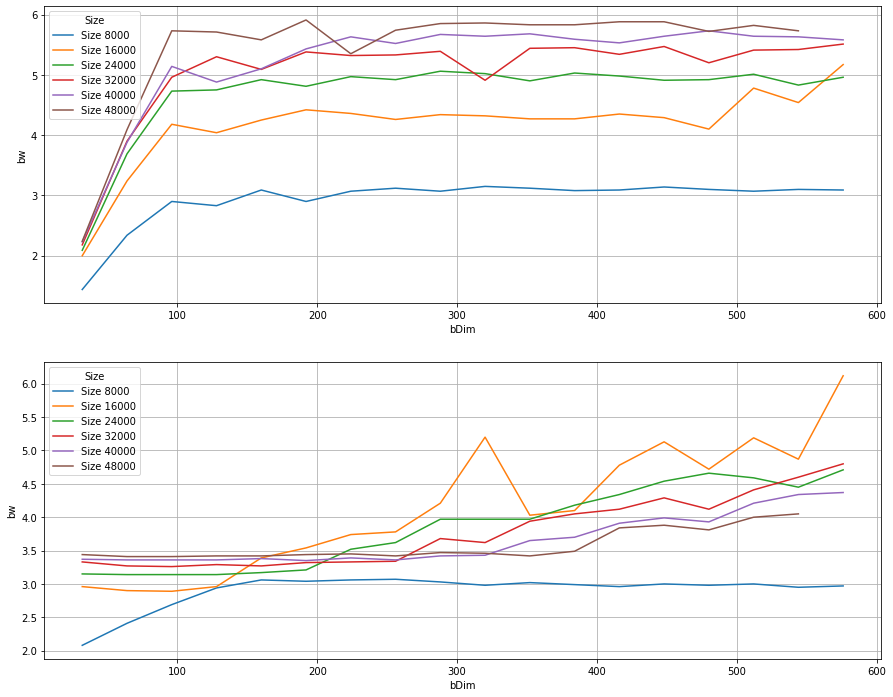

In [864]:
fig, ax = plt.subplots(2,figsize=(15, 12))

for size,group in list_of_df[0].groupby('size'):
    ax[0].plot(group['bDim'], group['bw'], label=f"Size {size}")

for size,group in list_of_df[1].groupby('size'):
    ax[1].plot(group['bDim'], group['bw'], label=f"Size {size}")

    


ax[0].set_xlabel('bDim')
ax[0].set_ylabel('bw')
ax[0].legend(title='Size')
ax[0].grid(True)


ax[1].set_xlabel('bDim')
ax[1].set_ylabel('bw')
ax[1].legend(title='Size')
ax[1].grid(True)
plt.show()
